In [44]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [45]:
train_data = pd.read_csv("cs-training.csv")

In [46]:
train_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [47]:
test_data = pd.read_csv("cs-test.csv")

In [48]:
test_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


Data Cleaning

In [49]:
test_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [50]:
train_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [70]:
train_data.isna().sum()

,0
SeriousDlqin2yrs,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


Insight = 24% records in monthly income are null

In [52]:
test_data.isnull().sum()

,0
SeriousDlqin2yrs,101503
RevolvingUtilizationOfUnsecuredLines,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,20103
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


we have to predict seriousDlqin - removing it from test data

In [54]:
test_data.drop('SeriousDlqin2yrs', axis = 1, inplace = True)

Imputing with mean

In [71]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Apply imputation on MonthlyIncome and NumberOfDependents
train_data[['MonthlyIncome', 'NumberOfDependents']] = imputer.fit_transform(train_data[['MonthlyIncome', 'NumberOfDependents']])

# Verify missing values are handled
print(train_data.isnull().sum())

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [55]:
# Apply imputation on MonthlyIncome and NumberOfDependents
test_data[['MonthlyIncome', 'NumberOfDependents']] = imputer.fit_transform(test_data[['MonthlyIncome', 'NumberOfDependents']])

# Verify missing values are handled
print(test_data.isnull().sum())

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [29]:
test_data.dropna(inplace = True)

In [30]:
train_data.shape

(83920, 11)

In [31]:
test_data.shape

(81400, 10)

#Boxplots for outlier detection

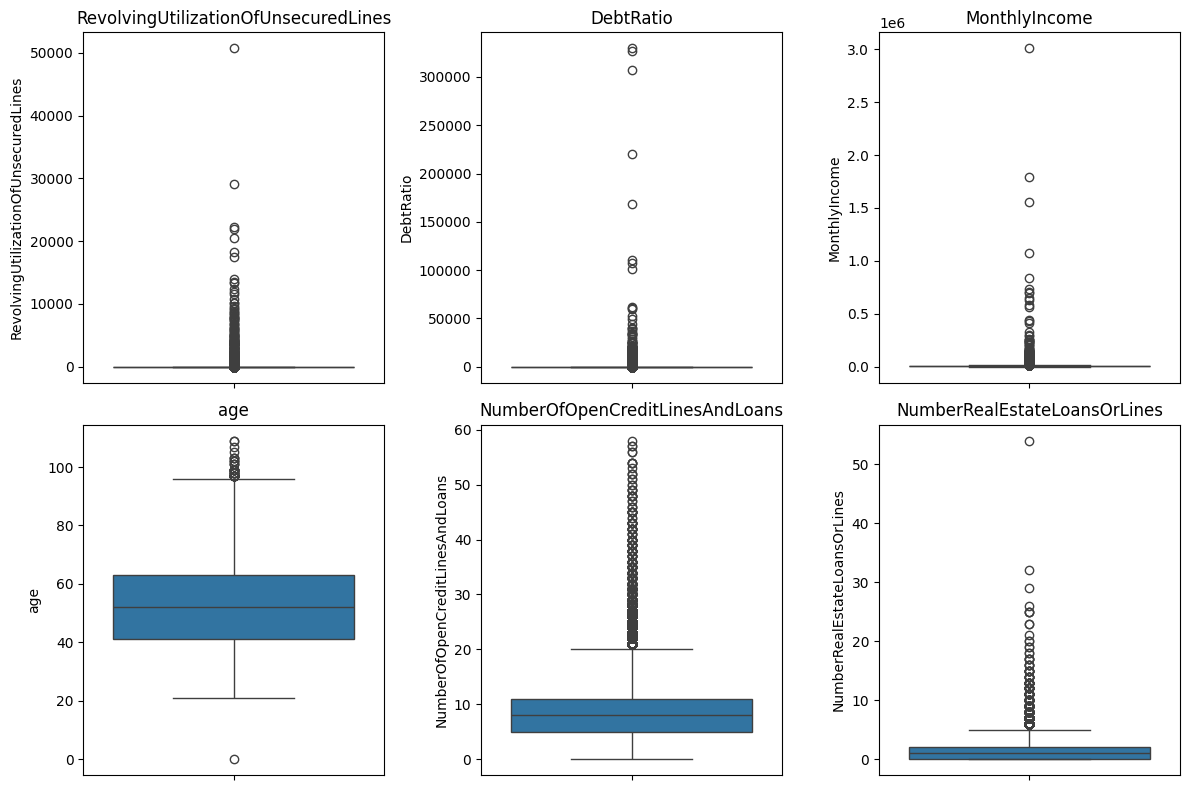

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'MonthlyIncome', 'age',
            'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']


plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=train_data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


#Insight
NumberOfOpenCreditLinesAndLoans & NumberRealEstateLoansOrLines:
Most values are concentrated near the lower end, but a few individuals have very high numbers of loans (50+).
These cases may represent business owners or investors rather than typical individuals.


DebtRatio:

Several values are way above 1 (100,000+), which is unrealistic.
This suggests some individuals have incorrectly reported debt or income values.
MonthlyIncome:

Huge outliers reaching into the millions.
It’s possible that a few individuals earn exceptionally high salaries, or there are data entry errors.

checking for class imbalance

In [57]:
train_data['SeriousDlqin2yrs'].value_counts()

,count
SeriousDlqin2yrs,
0,139974
1,10026


Shows class imbalance in target variable

because there is a lot of outliers and class imbalances, in order to use logistic regression as baseline method, we will have to do class balancing

#Separating Feature and Label

In [74]:
X = train_data.drop(['SeriousDlqin2yrs'], axis=1)
y = train_data['SeriousDlqin2yrs']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

#Logistic Regression model as baseline

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [78]:
# Standardize numerical features (Logistic Regression is sensitive to scale)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [79]:
X_test_scaled

array([[-0.02704853,  1.13103231, -0.10081069, ..., -0.8974709 ,
        -0.05745339, -0.68808206],
       [-0.02702971,  0.25030673,  0.14112529, ...,  0.86662856,
        -0.05745339,  1.12614188],
       [-0.02664504, -0.08843388, -0.10081069, ...,  1.74867829,
        -0.05745339, -0.68808206],
       ...,
       [-0.02263002, -0.156182  ,  0.86693321, ..., -0.01542117,
        -0.05745339,  0.21902991],
       [-0.0262192 ,  0.7922917 , -0.10081069, ..., -0.8974709 ,
        -0.05745339,  0.21902991],
       [-0.02628786, -0.49492261, -0.10081069, ..., -0.8974709 ,
        -0.05745339,  1.12614188]])

In [80]:
log_reg = LogisticRegression(class_weight='balanced', random_state=42)


In [81]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


In [85]:
y_pred = log_reg.predict(X_test_scaled)

In [86]:
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7715
ROC-AUC Score: 0.5281084836226656
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.78      0.86     27987
           1       0.17      0.64      0.27      2013

    accuracy                           0.77     30000
   macro avg       0.57      0.71      0.57     30000
weighted avg       0.91      0.77      0.82     30000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#Possible reasons for a low ROC score:
1) Class imbalance
2) Relationships may be non-linear

#Trying tree based models because they are more robust to class imbalance

In [100]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  # Handles class imbalance
    n_estimators=200,  # Number of trees
    max_depth=5,  # Tree depth to prevent overfitting
    learning_rate=0.1,  # Step size for updates
    subsample=0.8,  # Subsample data to prevent overfitting
    colsample_bytree=0.8,  # Use only a fraction of features per tree
    random_state=42)

In [101]:
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probability for ROC-AUC

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8103666666666667
ROC-AUC Score: 0.8617095500179976
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89     27987
           1       0.22      0.74      0.34      2013

    accuracy                           0.81     30000
   macro avg       0.60      0.78      0.62     30000
weighted avg       0.93      0.81      0.85     30000



#Using grid search for finding best set of parameters

In [116]:
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint

In [121]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import xgboost as xgb
from sklearn.metrics import roc_auc_score


xgb_param_grid = {
    'n_estimators': [500],
    'max_depth': [5, 7],
    'learning_rate': [0.05],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}


rf_param_grid = {
    'n_estimators': randint(100, 200),
    'max_depth': randint(10, 15)
}


xgb_model = xgb.XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), random_state=42)
xgb_search = RandomizedSearchCV(xgb_model, xgb_param_grid, scoring='roc_auc', n_jobs=-1, n_iter=10, verbose=1, random_state=42)
xgb_search.fit(X_train, y_train)


rf_model = RandomForestClassifier()
rf_search = RandomizedSearchCV(rf_model, rf_param_grid, n_iter=10, cv=3, n_jobs=-1, scoring='roc_auc', random_state=42, verbose=1)
rf_search.fit(X_train, y_train)

# Getting best models
best_xgb = xgb_search.best_estimator_
best_rf = rf_search.best_estimator_

# Getting predicted probabilities
xgb_probs = best_xgb.predict_proba(X_test)[:, 1]
rf_probs = best_rf.predict_proba(X_test)[:, 1]

# Computing ROC-AUC scores
xgb_roc_auc = roc_auc_score(y_test, xgb_probs)
rf_roc_auc = roc_auc_score(y_test, rf_probs)

# Print results
print(f"XGBoost ROC-AUC Score: {xgb_roc_auc}")
print(f"Random Forest ROC-AUC Score: {rf_roc_auc}")
print(f"Best XGBoost Parameters: {xgb_search.best_params_}")
print(f"Best Random Forest Parameters: {rf_search.best_params_}")

# Selecting the best model based on ROC-AUC
best_model = best_xgb if xgb_roc_auc > rf_roc_auc else best_rf
print("Selected Model:", "XGBoost" if best_model == best_xgb else "Random Forest")


Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits
XGBoost ROC-AUC Score: 0.8611113729245274
Random Forest ROC-AUC Score: 0.8649228615137845
Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best Random Forest Parameters: {'max_depth': 11, 'n_estimators': 182}
Selected Model: Random Forest


#Confusion Matrix & ROC curve

In [122]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = best_model.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[27760   227]
 [ 1687   326]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     27987
           1       0.59      0.16      0.25      2013

    accuracy                           0.94     30000
   macro avg       0.77      0.58      0.61     30000
weighted avg       0.92      0.94      0.92     30000



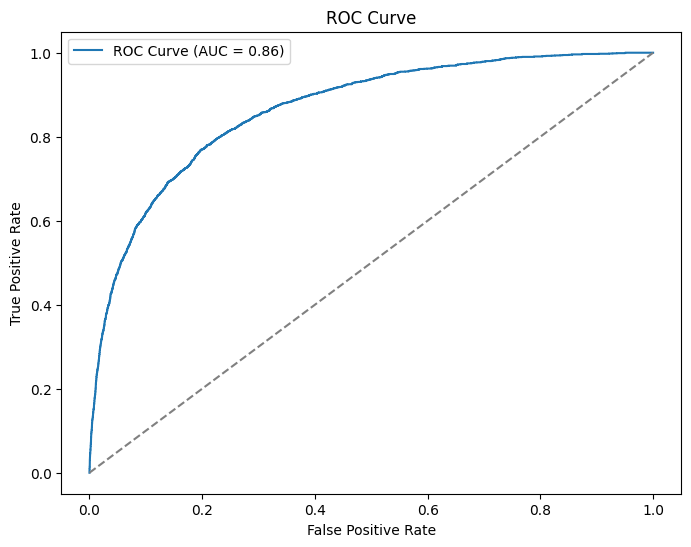

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # Random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()
